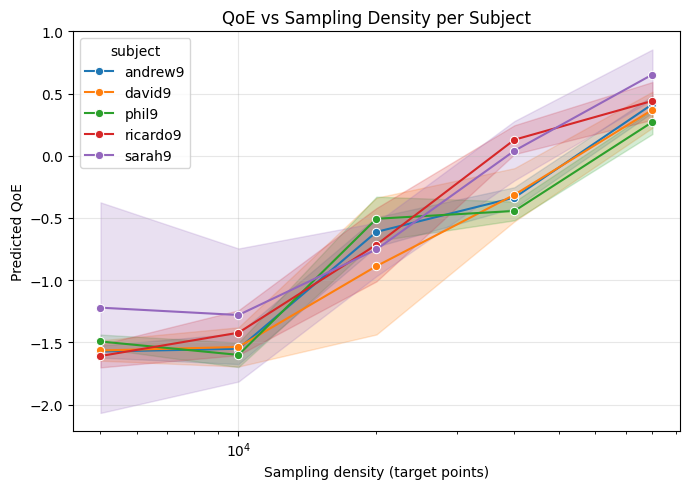

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = "data/pc_projection_qoe.csv"
df = pd.read_csv(csv_path)

# Aggregate QoE per sampling density
agg = (
    df.groupby("target_points")["qoe_prediction"]
      .agg(["mean", "std", "count"])
      .reset_index()
)

plt.figure(figsize=(7,5))
sns.lineplot(
    data=df,
    x="target_points",
    y="qoe_prediction",
    hue="subject",
    estimator="mean",
    errorbar=("sd", 1),  # mean ± 1 std
    marker="o"
)
plt.xscale("log")
plt.xlabel("Sampling density (target points)")
plt.ylabel("Predicted QoE")
plt.title("QoE vs Sampling Density per Subject")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


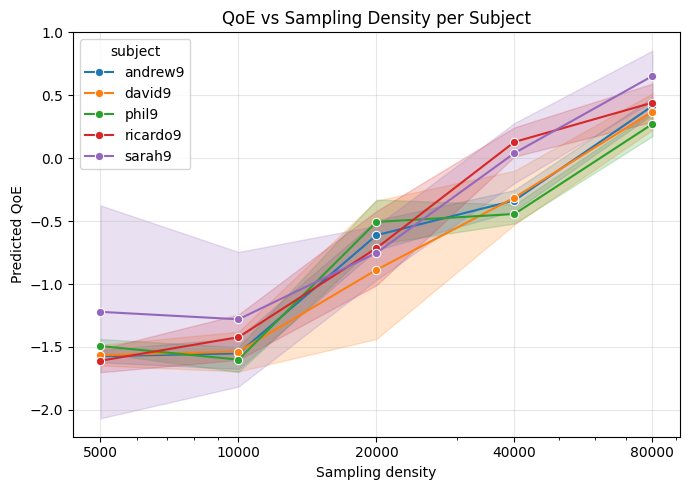

In [8]:
plt.figure(figsize=(7,5))

sns.lineplot(
    data=df,
    x="target_points",
    y="qoe_prediction",
    hue="subject",
    estimator="mean",
    errorbar=("sd", 1),
    marker="o"
)

plt.xscale("log")

# --- FIX: determine all unique x-values, set as ticks ---
ticks = sorted(df["target_points"].unique())
plt.xticks(ticks, [str(t) for t in ticks])

plt.xlabel("Sampling density")
plt.ylabel("Predicted QoE")
plt.title("QoE vs Sampling Density per Subject")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("qoe-vs-subsampling.png")
plt.show()